# ESERCIZIO KAGGLE

Importo alcune librerie che mi saranno utili, e i dati di training.

In [1]:
%pylab inline
import pandas as pd
from scipy import sparse

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_data = pd.read_csv("../datamining2021/train_data.csv", encoding="utf8")
target = pd.read_csv("../datamining2021/train_target.csv")

# Estrazione features

Estraggo le features dai DataFrame, in modo tale da rendere l'insieme dei subreddits e dei testi collegati ad un certo autore delle liste ordinate con lo stesso ordine degli autori della Serie pandas target.

In [3]:
train_data


,author,subreddit,created_utc,body
0,Shamus_Aran,mylittlepony,1.388534e+09,I don't think we'd get nearly as much fanficti...
1,Riddance,sex,1.388534e+09,"Thanks. I made it up, that's how I got over my..."
2,Secret_Wizard,DragonsDogma,1.388534e+09,Are you sure you aren't confusing Cyclops (the...
3,Penultimatum,malefashionadvice,1.388534e+09,dont do this to me bro
4,7-SE7EN-7,todayilearned,1.388534e+09,That's what we do when we can't find a mate
...,...,...,...,...
296037,Tashre,FiftyFifty,1.391213e+09,I don't want to play this game anymore :(
296038,someguyfromtheuk,AskReddit,1.391213e+09,Twist: I am your son and staged all of this to...
296039,spurscanada,HIMYM,1.391213e+09,I think a lot of people don't like her because...
296040,SPAZZEH,politics,1.391213e+09,And the Tea Party must be having strokes right...


In [4]:
subreddits = train_data.subreddit.unique()
subreddits_map = pd.Series(index=subreddits, data=arange(subreddits.shape[0]))

In [7]:
list(train_data[train_data.author == "Riddance"].subreddit)

['sex',
 'AskReddit',
 'AskReddit',
 'sex',
 '2007scape',
 'AskReddit',
 'changemyview',
 'changemyview',
 'changemyview',
 '2007scape',
 'changemyview',
 'changemyview',
 'changemyview',
 'AskReddit',
 'changemyview',
 'changemyview',
 'AskReddit',
 'changemyview',
 'changemyview',
 'changemyview',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',
 'AskReddit',

In [8]:
subreddits_map

mylittlepony            0
sex                     1
DragonsDogma            2
malefashionadvice       3
todayilearned           4
                     ... 
palegirls            3463
onions               3464
mumfordandsons       3465
infertility          3466
HangoutFest          3467
Length: 3468, dtype: int32

In [5]:
def extract_subreddits(group):
    group_text = group['subreddit'].values
    return " ".join(group_text)

In [6]:
subreddits_dict = {}

for author, group in train_data.groupby('author'):
    subreddits_dict[author] = extract_subreddits(group)

In [7]:
y = target.gender
y_class1= target.gender.sum()
y_class1

1349

In [9]:
def extract_text(group):
    group_text = group['body'].values
    return " ".join(group_text)

In [10]:
text_dict = {}

for author, group in train_data.groupby('author'):
    text_dict[author] = extract_text(group)

In [11]:
author_subreddits = [subreddits_dict[author] for author in target.author]
author_text = [text_dict[author] for author in target.author]

In [12]:
print(len(author_text))
print(len(author_subreddits))
print(type(author_text))
print(type(author_subreddits))

5000
5000
<class 'list'>
<class 'list'>


In [16]:
author_subreddits

['videos',
 'aww AskReddit gaming AskReddit AskReddit AskReddit gaming AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit explainlikeimfive explainlikeimfive AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit GetMotivated GetMotivated chemistry gaming AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit explainlikeimfive explainlikeimfive explainlikeimfive explainlikeimfive explainlikeimfive explainlikeimfive explainlikeimfive funny funny chemistry AskMen AskReddit AskReddit funny gaming AskWomen explainlikeimfive AskReddit explainlikeimfive chemistry explainlikeimfive explainlikeimfive funny AskReddit AskReddit AskWomen AskWomen AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskReddit AskRedd

In [23]:
author_text[2]

"Do you even read what he wrote? 250 Stacks = 750 damage. I don't think you'd have 750 damage already after 20 minutes, my friend."

# Pre processing dati body

Si inizia il pre-processing dei dati del body text tramite la vettorizzazione delle parole con CountVectorizer (compresi i bigrammi) e applicando la Term Frequency-Inverse Document Frequency (tFidf) perché si vuole considerare l'importanza relativa di alcune parole, pesandole con l'inverso della frequenza. Dall'analisi sono state scartate le stop words.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS

pattern ='(?u)\\b[A-Za-z]{3,}'

stop_words = set(list(ENGLISH_STOP_WORDS) + ['test'])

cv = CountVectorizer(token_pattern=pattern, stop_words=stop_words, ngram_range=(1, 2)) 
C = cv.fit_transform(author_text)

tfidf = TfidfTransformer()
 
X_train_text = tfidf.fit_transform(C)
print()
print("X_train_text is a sparse matrix with shape: %s" % str(X_train_text.shape))
print()


X_train_text is a sparse matrix with shape: (5000, 2752351)



Un'altro passaggio di pre-processing che sarà svolto è la Singolar Value Decomposition, atta a snellire la matrice di training del testo con le parole che sono più significative. In questo modo si può eliminare un po' di rumore deterministico, evitare eccessivo overfitting, e soprattutto facilitare la computazione del modello.

In [12]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(100)

pca.fit(X_train_text) 

U_train_text = pca.transform(X_train_text)
S_train_text = pca.explained_variance_ 
V_train_text = pca.components_

print (U_train_text.shape)
print (S_train_text.shape)
print (V_train_text.shape)

(5000, 100)
(100,)
(100, 2752351)


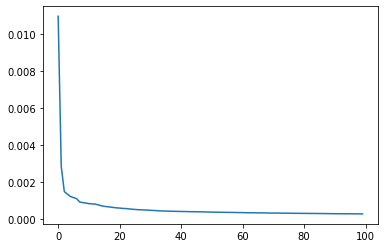

In [13]:
plt.plot(pca.explained_variance_)

Dalla PCA si vuole estrarre il 90% di informazione dal testo, cercando di eliminare le informazioni irrilevanti. 

79


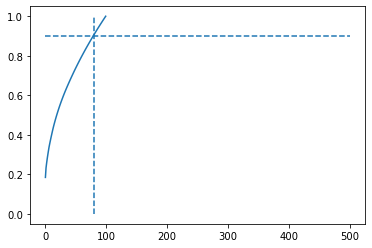

In [14]:
ev_cumsum = np.cumsum(pca.explained_variance_)/(pca.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print (ev_at90)

plt.plot(ev_cumsum)
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 500, linestyles='dashed'); #raccoglie il 90% di informazioni del data set

In [15]:
pca = TruncatedSVD(79)

pca.fit(X_train_text)

U_train_text = pca.transform(X_train_text)
S_train_text = pca.explained_variance_ #singular values in SVD
V_train_text = pca.components_
print (U_train_text.shape) #l'algoritmo tiene presente solo la U che contribuisce, non quello che moltiplica la parte di zeri di sigma (la matrice U non sarà più unitaria), inoltre sigma ha solo valori diagonali
print (S_train_text.shape)
print (V_train_text.shape)

(5000, 79)
(79,)
(79, 2752351)


# Fase di learning dal body text

Si inizia la fase di learning dal body text. Il modello di classificazione scelto è il Support Vector Classifier con kernel RBF, validato con 10-Fold Cross Validation per diversi parametri gamma. Il parametro class_weight è stato settato 'balanced' per tenere conto del fatto che i dati in input sono abbastanza sbilanciati verso la classe 0 (i target di classe 1 sono 1349 su 5000). 

In [16]:
from sklearn import svm, model_selection
from sklearn.model_selection import cross_val_score

model_truncated= svm.SVC(kernel='rbf',class_weight= 'balanced')
gammas= np.logspace(-3,2,20)
scores= []

from tqdm import tqdm

for gamma in tqdm(gammas):
        model_truncated.gamma=gamma
        scores.append(np.mean(cross_val_score(model_truncated, U_train_text, y, cv=10 ))) #U per passare la matrice troncata

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [10:34<00:00, 31.73s/it]


Best gamma: 0.42813323987193913
Best score: 0.8131999999999999


Text(0, 0.5, 'Score (accuracy)')

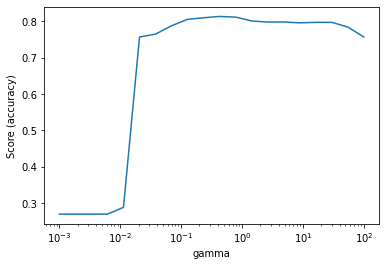

In [19]:
print ('Best gamma:', gammas[np.argmax(scores)])
print ('Best score:', scores[np.argmax(scores)])

semilogx(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Score (accuracy)')

Fissato gamma, con lo stesso metodo provo a cercare una C che migliori lo score in sample.

In [20]:
model_truncated= svm.SVC(kernel='rbf',class_weight= 'balanced', gamma=0.42813323987193913)
Cs= np.logspace(-1,1,20)
scores= []

from tqdm import tqdm

for C in tqdm(Cs):
        model_truncated.C=C
        scores.append(np.mean(cross_val_score(model_truncated, U_train_text, y, cv=10 ))) 

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [10:05<00:00, 30.27s/it]


Best C: 1.1288378916846888
Best score: 0.8140000000000001


Text(0, 0.5, 'Score (accuracy)')

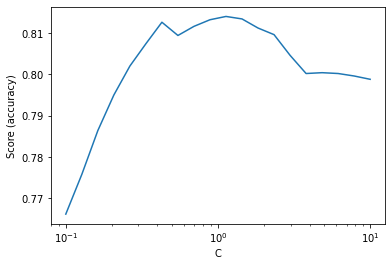

In [21]:
print ('Best C:', Cs[np.argmax(scores)])
print ('Best score:', scores[np.argmax(scores)])

semilogx(Cs, scores)
plt.xlabel('C')
plt.ylabel('Score (accuracy)')

Così ottengo il mio modello finale per il body text.

In [24]:
final_model_text_SVC = svm.SVC(gamma=0.42813323987193913, C= 1.1288378916846888 , class_weight= 'balanced', probability= True)
final_model_text_SVC.fit(U_train_text, y)

SVC(C=1.1288378916846888, class_weight='balanced', gamma=0.42813323987193913,
    probability=True)

# Features Extraction del test data

Adesso leggo e preprocesso i dati di test esattamente allo stesso modo in cui sono stati preprocessati i dati di training. In questo caso nei dati di test è stato trovato e rimosso un naan con una stopwords, la quale non influirà sulla fase di prediction.

In [25]:
test_data = pd.read_csv("../datamining2021/test_data.csv", encoding="utf8")

In [26]:
print(test_data.body.isna().sort_values())
test_data.body.loc[1063323]="and"

0          False
738620     False
738621     False
738622     False
738623     False
           ...  
369311     False
369310     False
369315     False
1107945    False
1063323     True
Name: body, Length: 1107946, dtype: bool


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
test_subreddits = test_data.subreddit.unique()
test_subreddits_map = pd.Series(index=test_subreddits, data=arange(test_subreddits.shape[0]))

In [28]:
test_subreddits_dict = {}

for author, group in test_data.groupby('author'):
    test_subreddits_dict[author] = extract_subreddits(group)

test_author_subreddits = [test_subreddits_dict[author] for author in test_data.author.unique()]

In [29]:
test_text_dict = {}
for author, group in test_data.groupby('author'):
    test_text_dict[author] = extract_text(group)

test_author_text = [test_text_dict[author] for author in test_data.author.unique()]

In [30]:
print(type(test_author_subreddits))
print(len(test_author_subreddits))
print(type(test_author_text))
print(len(test_author_text))

<class 'list'>
15000
<class 'list'>
15000


# Predict test data con modello di body text

Una volta processati i dati di test proseguo con la predizione. Per fare predict con un modello di training fatto con matrici dense ( U_train_text ) bisogna passare al modello un'altra matrice densa. Per questo motivo sarà applicata la PCA anche ai dati di testing del body. 

Fatto il preprocessing, estraggo dalla predizione l'array contenente le probabilità di appartenere alla classe 1 di ciascun utente reddit.

In [31]:
C_test_text = cv.transform(test_author_text)
X_test_text = tfidf.transform(C_test_text)
 
pca = TruncatedSVD(79)

pca.fit(X_test_text)

U_test_text = pca.transform(X_test_text)

print("Classified: %s" % final_model_text_SVC.predict(U_test_text))

Classified: [0 0 0 ... 0 0 0]


In [33]:
final_model_text_SVC.predict_proba(U_test_text)

array([[0.97219868, 0.02780132],
       [0.99016612, 0.00983388],
       [0.9839753 , 0.0160247 ],
       ...,
       [0.9688251 , 0.0311749 ],
       [0.95462465, 0.04537535],
       [0.80754976, 0.19245024]])

In [35]:
pred_text=pd.Series(final_model_text_SVC.predict_proba(U_test_text)[:,1])
pred_text.values

array([0.02780132, 0.00983388, 0.0160247 , ..., 0.0311749 , 0.04537535,
       0.19245024])

# Classificazione sui subreddit con SVC

Processo i dati del subreddit utilizzando ancora una volta CountVectorizer e la Term Frequency-Inverse Document Frequency (tFidf). Questa volta i bigrammi non sono stati considerati, così come le stop words. In questo modo si evita di non considerare un subreddit importante, ma che è formato da una parola molto comune in inglese.

Per il learning sono stati utilizzati due modelli: SVC e MultinomialNB (Naive Bayes).

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
pattern ='(?u)\\b[A-Za-z]{3,}'

cv = CountVectorizer(token_pattern=pattern, ngram_range=(1, 1)) #ngram_range prende bigrammi oltre che parole singole
C = cv.fit_transform(author_subreddits)

tfidf = TfidfTransformer()
                        
#calculate features using tf-idf and create a training set 
X_train_subreddits = tfidf.fit_transform(C)
print()
print("X_train_subreddits is a sparse matrix with shape: %s" % str(X_train_subreddits.shape))
print()


X_train_subreddits is a sparse matrix with shape: (5000, 3363)



Il primo modello ad essere implementato è il SVC, seguendo lo stesso procedimento usato nell'analisi del body text.

In [40]:
modello_subreddits= svm.SVC(kernel='rbf', class_weight= 'balanced')
gammas= np.logspace(-3,2,20)
scores= []

from tqdm import tqdm

for gamma in tqdm(gammas):
        modello_subreddits.gamma=gamma
        scores.append(np.mean(cross_val_score(modello_subreddits, X_train_subreddits, y, cv=10 ))) #U per passare la matrice troncata

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [08:39<00:00, 25.95s/it]


Best gamma: 0.12742749857031335
Best score: 0.8215999999999999


Text(0, 0.5, 'Score (accuracy)')

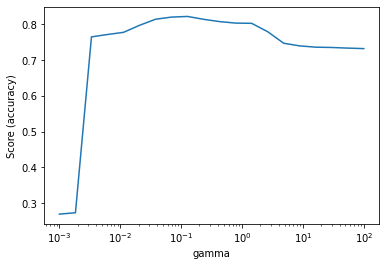

In [41]:
print ('Best gamma:', gammas[np.argmax(scores)])
print ('Best score:', scores[np.argmax(scores)])

semilogx(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Score (accuracy)')

In [42]:
modello_subreddits= svm.SVC(kernel='rbf',class_weight= 'balanced', gamma=0.12742749857031335)
Cs= np.logspace(-1,1,20)
scores= []

from tqdm import tqdm

for C in tqdm(Cs):
        modello_subreddits.C=C
        scores.append(np.mean(cross_val_score(modello_subreddits, X_train_subreddits, y, cv=10 ))) #U per passare la matrice troncata

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [06:48<00:00, 20.45s/it]


Best C: 0.8858667904100825
Best score: 0.8241999999999999


Text(0, 0.5, 'Score (accuracy)')

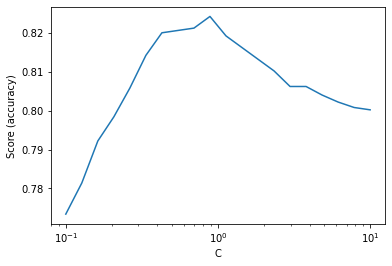

In [44]:
print ('Best C:', Cs[np.argmax(scores)])
print ('Best score:', scores[np.argmax(scores)])

semilogx(Cs, scores)
plt.xlabel('C')
plt.ylabel('Score (accuracy)')

Così ottengo il mio modello finale di SVC per i subreddit.

In [45]:
final_model_SVC_subreddits = svm.SVC(probability= True, kernel='rbf', gamma= 0.12742749857031335, C=0.8858667904100825, class_weight= 'balanced')
final_model_SVC_subreddits.fit(X_train_subreddits, y)

SVC(C=0.8858667904100825, class_weight='balanced', gamma=0.12742749857031335,
    probability=True)

# Predict test data con SVC per i subreddit

A questo punto faccio il predict del test set per i subreddit con i parametri fissati dalla cross validation. Estraggo poi l'array contenente le probabilità di appartenere alla classe 1 di ciascun utente reddit.

In [46]:
C_test_subreddits = cv.transform(test_author_subreddits)
X_test_subreddits = tfidf.transform(C_test_subreddits)

print("Classified: %s" % final_model_SVC_subreddits.predict(X_test_subreddits))

Classified: [1 0 1 ... 0 0 0]


In [47]:
final_model_SVC_subreddits.predict_proba(X_test_subreddits)[:,1]

array([0.97862924, 0.04780607, 0.78131865, ..., 0.11908016, 0.21611993,
       0.08889549])

In [48]:
pred_subreddits_SVC=pd.Series(final_model_SVC_subreddits.predict_proba(X_test_subreddits)[:,1])
pred_subreddits_SVC.values

array([0.97862924, 0.04780607, 0.78131865, ..., 0.11908016, 0.21611993,
       0.08889549])

# Classificazione sui subreddit con MultinomialNB

Inizio il learning per il modello MultinomialNB sui dati di training dei subreddit. Per la stima del parametro alpha è stata utilizzata la 10 Fold Cross Validation su un set di 50 valori.

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
clf = MultinomialNB()
scores=[]

alphas=logspace(-2,0)


from tqdm import tqdm

for alpha in tqdm(alphas):

        clf.alpha=alpha
        clf.fit(X_train_subreddits, y)
        scores.append(np.mean(cross_val_score(clf, X_train_subreddits, y, cv=10 )))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 21.79it/s]


Best alpha: 0.20235896477251566
Best score: 0.8478


Text(0, 0.5, 'Score (accuracy)')

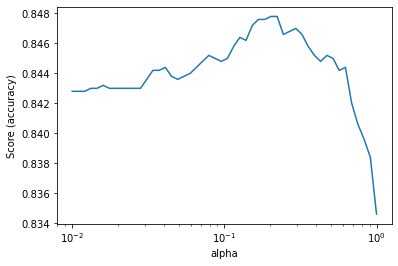

In [56]:
print ('Best alpha:', alphas[np.argmax(scores)])
print ('Best score:', scores[np.argmax(scores)])

semilogx(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('Score (accuracy)')

Ottengo così il mio modello finale da testare.

In [59]:
final_model_NB_subreddits = MultinomialNB(alpha=0.20235896477251566)
final_model_NB_subreddits.fit(X_train_subreddits, y)

MultinomialNB(alpha=0.20235896477251566)

# Predict test data con MultinomialNB per i subreddit

A questo punto faccio il predict del test set per i subreddit con il parametro fissato dalla cross validation. Estraggo poi l'array contenente le probabilità di appartenere alla classe 1 di ciascun utente reddit.

In [61]:
C_test_subreddits = cv.transform(test_author_subreddits)
X_test_subreddits = tfidf.transform(C_test_subreddits)
 

print("Classified: %s" % final_model_NB_subreddits.predict(X_test_subreddits))

Classified: [1 0 0 ... 0 0 0]


In [62]:
final_model_NB_subreddits.predict_proba(X_test_subreddits)[:,1]

array([0.99571827, 0.0060317 , 0.31354359, ..., 0.04942257, 0.41806628,
       0.026827  ])

In [63]:
pred_subreddits_NB=pd.Series(final_model_NB_subreddits.predict_proba(X_test_subreddits)[:,1])
pred_subreddits_NB.values

array([0.99571827, 0.0060317 , 0.31354359, ..., 0.04942257, 0.41806628,
       0.026827  ])

# Ensemble method

Per mettere insieme i tre modelli è stato utilizzato il più triviale fra gli ensemble method. Il principio di questo metodo è fare la media di estimatori diversi in modo da ridurre la varianza.

In [68]:
pred_subreddits_SVC.values

array([0.97862924, 0.04780607, 0.78131865, ..., 0.11908016, 0.21611993,
       0.08889549])

In [69]:
pred_subreddits_NB.values

array([0.99571827, 0.0060317 , 0.31354359, ..., 0.04942257, 0.41806628,
       0.026827  ])

In [70]:
pred_text.values

array([0.02780132, 0.00983388, 0.0160247 , ..., 0.0311749 , 0.04537535,
       0.19245024])

In [74]:
AVG_pred=(pred_subreddits_SVC.values+pred_subreddits_NB.values+pred_text.values)/3
AVG_pred

array([0.66738294, 0.02122388, 0.37029564, ..., 0.06655921, 0.22652052,
       0.10272424])

In [75]:
AVG_pred_subreddits=pd.DataFrame(test_data.author.unique(),columns=["author"] )
AVG_pred_subreddits["gender"]=AVG_pred
AVG_pred_subreddits

,author,gender
0,ejchristian86,0.667383
1,ZenDragon,0.021224
2,savoytruffle,0.370296
3,hentercenter,0.052000
4,rick-o-suave,0.186650
...,...,...
14995,oneblazeofglory,0.521728
14996,prettydamnquick,0.735529
14997,The-Rtnb-Ab-Traxv,0.066559
14998,TheGrandRebel,0.226521


In [76]:
AVG_pred_subreddits.to_csv("Modello_Gennaro_Martone.csv", index=False)